# Let's train a diffusion generative model for point clouds using a gaussian dataset

In [2]:
import numpy as np
import os,re
import tensorflow as tf
from tensorflow import keras
import utils
from GSGM import GSGM
from tensorflow.keras.callbacks import ModelCheckpoint

tf.random.set_seed(1233)

In [4]:
#Load the configuration file with details about the dataset
config = utils.LoadJson('config.json')

In [5]:
nevts = int(1e5)

num_feat = config['NUM_FEAT']

#Let's generate sets containing 2 particles using gaussians
part1 = np.random.normal(-2.0,1.0,size=(nevts,1,num_feat))
part2 = np.random.normal(2.0,1.0,size=(nevts,1,num_feat))
data = np.concatenate([part1[:nevts//2],part2[:nevts//2]],1)

model = GSGM(config=config)
checkpoint_folder = '../checkpoints_toy/checkpoint'

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 16)           0           ['input_1[0][0]']                
                                                                                                  
 tf.math.multiply_1 (TFOpLambda  (None, 16)          0           ['tf.math.multiply[0][0]']       
 )                                                                                                
                                                                                                  
 tf.math.multiply_2 (TFOpLambda  (None, 16)          0           ['tf.math.multiply_1[0][0]'] 

In [6]:
opt = tf.optimizers.Adam(learning_rate=config['LR'])    
model.compile(optimizer=opt)

callbacks = []
checkpoint = ModelCheckpoint(checkpoint_folder,mode='auto',
                                     period=1,save_weights_only=True)

callbacks.append(checkpoint)

history = model.fit(
        data,
        epochs=config['MAXEPOCH'],
        batch_size=config['BATCH'],
        callbacks=callbacks
        #steps_per_epoch=1,
    )


Epoch 1/50
98/98 [==============================] - 8s 16ms/step - loss: 0.5007
Epoch 2/50
98/98 [==============================] - 2s 17ms/step - loss: 0.3156
Epoch 3/50
98/98 [==============================] - 2s 15ms/step - loss: 0.3033
Epoch 4/50
98/98 [==============================] - 2s 17ms/step - loss: 0.2993
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 0.2997
Epoch 6/50
98/98 [==============================] - 1s 15ms/step - loss: 0.3033
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 0.3025
Epoch 8/50
98/98 [==============================] - 1s 15ms/step - loss: 0.3006
Epoch 9/50
98/98 [==============================] - 1s 15ms/step - loss: 0.2986
Epoch 10/50
98/98 [==============================] - 1s 15ms/step - loss: 0.2987
Epoch 11/50
98/98 [==============================] - 1s 15ms/step - loss: 0.2998
Epoch 12/50
98/98 [==============================] - 2s 17ms/step - loss: 0.3002
Epoch 13/50
98/98 [==================

In [7]:
if not os.path.exists('../plots'):
    os.mkdir('../plots')
generated = model.PCSampler(nevts,2).numpy()

Time for sampling 100000 events is 7.180604934692383 seconds


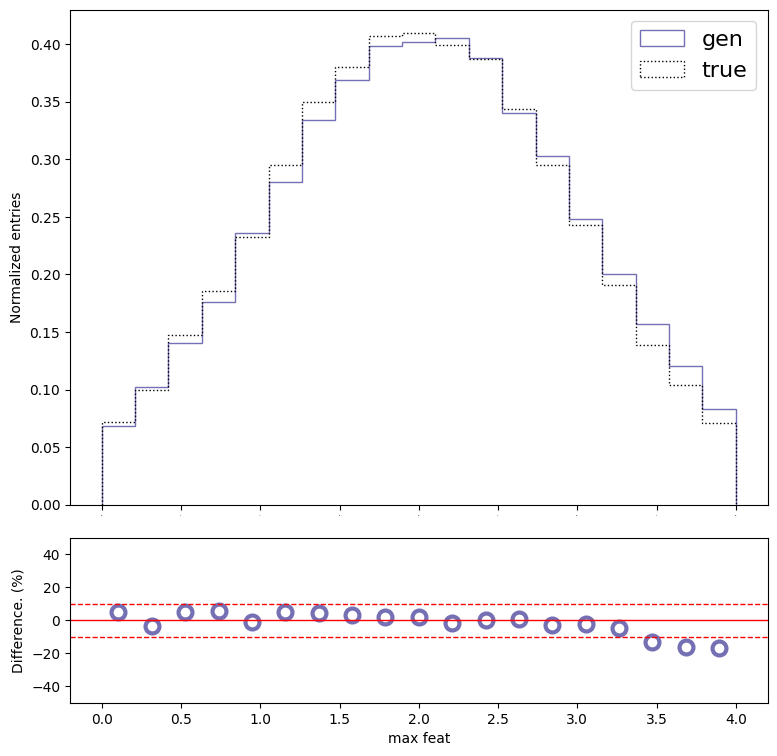

In [8]:
#Let's do some plotting
feed_dict = {
    'gen':np.max(generated[:,:,0],1),
    'true':np.max(data[:,:,0],1),
}

binning = np.linspace(0,4,20)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='max feat', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy_max.pdf')

/global/u2/v/vmikuni/GSGM/demo/utils.py:156: RuntimeWarning: divide by zero encountered in divide
  ratio = 100*np.divide(reference_hist-dist,reference_hist)


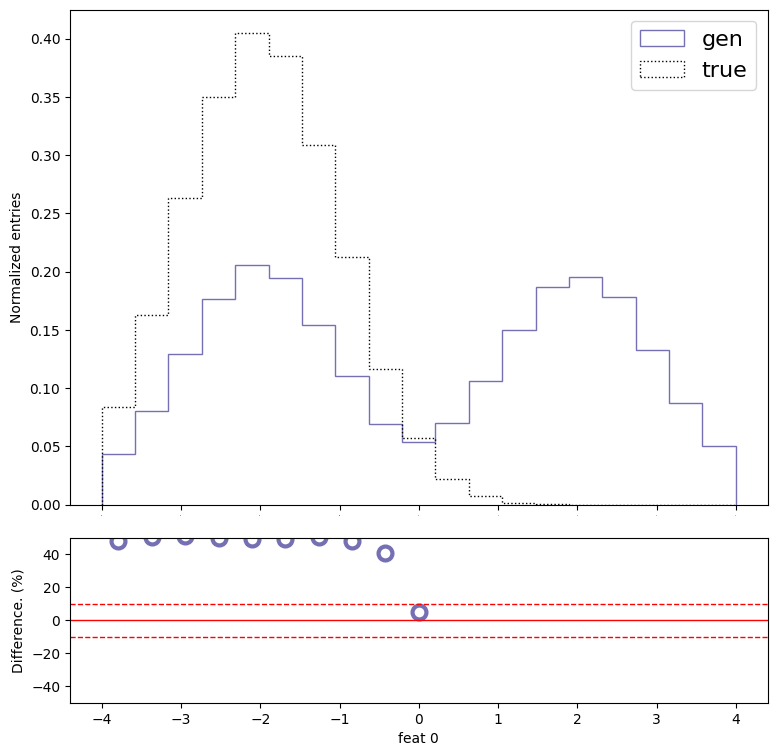

In [9]:
feed_dict = {
    'gen':generated[:,0,0],
    'true':data[:,0,0],
}

binning = np.linspace(-4,4,20)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='feat 0', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy.pdf')

# Does this plot make sense to you?

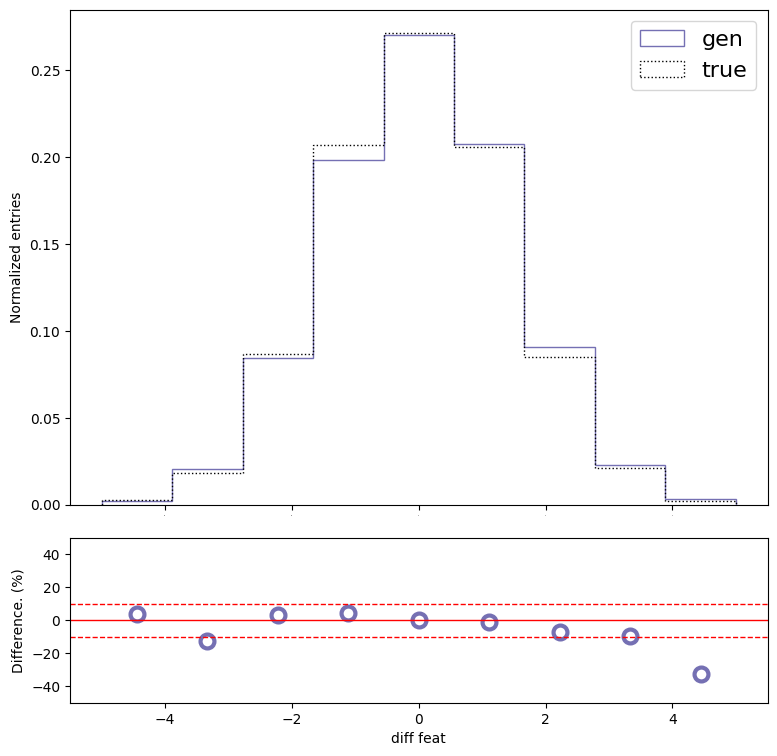

In [10]:
feed_dict = {
        'gen':generated[:,0,0]+generated[:,1,0],
        'true':data[:,0,0]+data[:,1,0],
}

binning = np.linspace(-5.0,5.0,10)
fig,ax0 =utils.HistRoutine(feed_dict,xlabel='diff feat', ylabel= 'Normalized entries',
                               logy=False,binning=binning)
fig.savefig('../plots/toy_diff.pdf')